# Material de aula - Aprendizado de Máquina


## Particle Swarm Optimization - Laboratório 06

In [2]:
#CÉLULA PSO-LIB-01
import numpy as np
import math
import matplotlib.pyplot as plt
from enum import Enum
from operator import xor
%matplotlib inline

In [3]:
#CÉLULA PSO-LIB-02
# Função para cálculo de fitness (aptidão de cada individuo)
def fitness(individual) :  
    
    #(x, y) = scale(individual)
    
    x = individual[0]
    y = individual[1]
    
    num = (np.sin(np.sqrt(x**2+y**2)))**2 - 0.5
    den = (1 + 0.001*(x**2+y**2)) ** 2
    z = 0.5 - (num / den)

    return z

In [4]:
#CÉLULA PSO-LIB-03
def plot_population(P, generation):
    
    xmin =-100
    xmax = 100
    ymin =-100
    ymax = 100
    
    xAxis = []
    yAxis = []
    for individual in P : #pega os individuos na população        
        x = individual['X']
        y = individual['Y']
        
        xAxis.append(x)
        yAxis.append(y)
    
    plt.figure()
    plt.plot(xAxis, yAxis, 'bo')
    plt.axis([xmin, xmax, ymin, ymax])
    
    plt.xlabel('x')
    plt.ylabel('y')
    sTitle = ('Populacao na geração {}'.format(generation))
    plt.title(sTitle)
    plt.grid()

In [5]:
#CÉLULA PSO-LIB-05
def calcAllPBest(vParticles) :
    vParticlesRet = []
    
    for particle in vParticles :
        x = particle['X']
        y = particle['Y']
        xBest = particle['XBest']
        yBest = particle['YBest']
        if (fitness((x,y)) >= fitness((xBest, yBest)) ) :
            particle['XBest'] = x
            particle['YBest'] = y
            
        vParticlesRet.append(particle)
    
    return vParticlesRet

In [6]:
#CÉLULA PSO-LIB-06
# Verifica o gbest
def calcGBest(vParticles) :
    #Inicializa variavel
    calcAllPBest(vParticles)
    x = vParticles[0]['XBest']
    y = vParticles[0]['YBest']
    maxFitness = fitness((x,y))

    for particle in vParticles :
        x = particle['XBest']
        y = particle['YBest']
        currentFitness = fitness((x,y))
        if ( currentFitness >= maxFitness ) :
            maxFitness = currentFitness
            gBest = {'X' : x, 'Y' : y, 'Fitness' : maxFitness}
    
    return gBest

In [7]:
#CÉLULA PSO-LIB-07
def calcPBest(particle) :   
    x = particle['X']
    y = particle['Y']
    xBest = particle['XBest']
    yBest = particle['YBest']
    currentFitness = fitness((x,y))
    if (currentFitness >= fitness((xBest, yBest)) ) :
        xBest = x
        yBest = y
                
    return (xBest, yBest)

## PSO - inicio

In [8]:
#CÉLULA PSO-MAIN-01
#Parâmetros
size_pop   = 100
max_generations = 100
stop_condition = 0.95

#Limites do dominio de definição
x_min = -100
x_max =  100

y_min = -100
y_max =  100


# Cada particula tem dados (X,Y, XBest, YBest)
gBest = {'X' : 0, 'Y' : 0, 'Fitness' : 0}
vParticles = []

deltaT = 1
c1 = 0.2
c2 = 0.3
w  = 0.2

vMax = 500 #limitação de velocidade

#r1 e r2 deverão ser extraídas de uma distribuição uniforme e são atualizadas a cada cálculo de velocidade da população
#as melhores posições, individual e global, são obtidas através da função de fitness

In [9]:
#CÉLULA PSO-MAIN-02
#Inicializando população
vParticles=[]

for _ in range(0, size_pop):
    x   =  x_min + np.random.random() * (x_max - x_min)
    y   =  y_min + np.random.random() * (y_max - y_min)
    vx  = (x_min + np.random.random() * (x_max - x_min)) / deltaT
    vy  = (y_min + np.random.random() * (y_max - y_min)) / deltaT
    vParticles.append({'X' : x, 'Y' : y, 'XBest' : x, 'YBest' : y, 'VX' : vx, 'VY':vy })
    
#Calcula pBest
#vParticles = calcPBest(vParticles)

#Calcula gbest
gBest = calcGBest(vParticles)

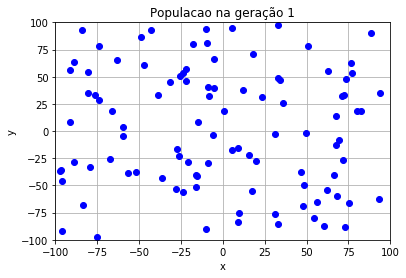

In [10]:
plot_population(vParticles, 1)

In [11]:
#CÉLULA PSO-MAIN-03
def runEpoch(vParticles) :
        #Atualizando vetor de velocidades
    r1 = np.random.random()
    r2 = np.random.random()

    #Atualiza pBest
    #vParticles = calcPBest(vParticles)
    
    for particle in vParticles :
        
        #Atualiza pbest
        (xBest, yBest) = calcPBest(particle)
        particle['XBest'] = xBest
        particle['YBest'] = yBest        
        
        #Atualiza gbest
        gBest = calcGBest(vParticles)
        
        #Atualiza velocidade de uma particula
        newVX = w*particle['VX'] + c1*r1*(particle['XBest'] - particle['X']) + c2*r2*(gBest['X'] - particle['X'])
        newVY = w*particle['VY'] + c1*r1*(particle['YBest'] - particle['Y']) + c2*r2*(gBest['Y'] - particle['Y'])
        
        #Equação sem a inercia da particula
        #newVX = c1*r1*(particle['XBest'] - particle['X']) + c2*r2*(gBest['X'] - particle['X'])
        #newVY = c1*r1*(particle['YBest'] - particle['Y']) + c2*r2*(gBest['Y'] - particle['Y'])
        
        #Verifica limite de velocidade
        if (newVX <= -vMax ) :
            newVX = -vMax

        if (newVX >= vMax ) :
            newVX = vMax

        if (newVY <= -vMax ) :
            newVY = -vMax

        if (newVY >= vMax ) :
            newVY = vMax

        #Atualiza a velocidade da particula
        particle['VX'] = newVX
        particle['VY'] = newVY

        #Atualiza a posição da particula
        newX = particle['X'] + newVX * deltaT
        newY = particle['Y'] + newVY * deltaT
        
        particle['X'] = newX
        particle['Y'] = newY

    return vParticles

c:\users\rcaro\appdata\local\programs\python\python35-32\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


99


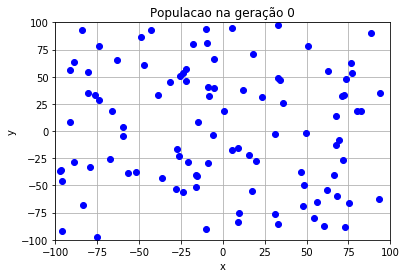

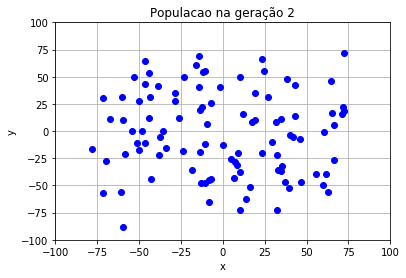

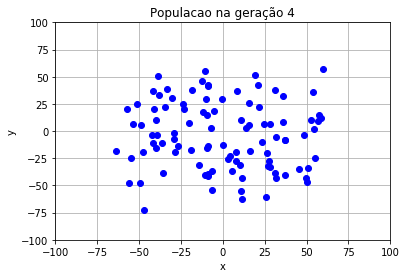

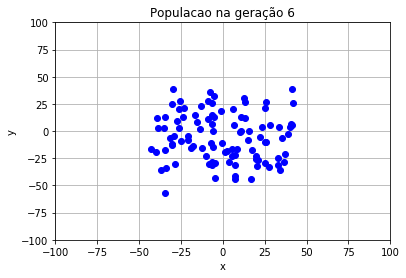

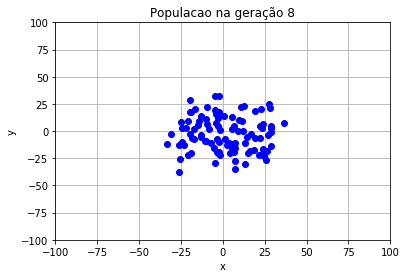

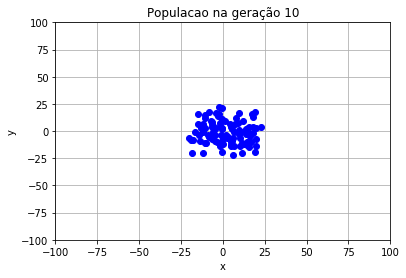

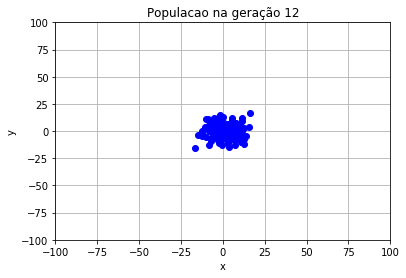

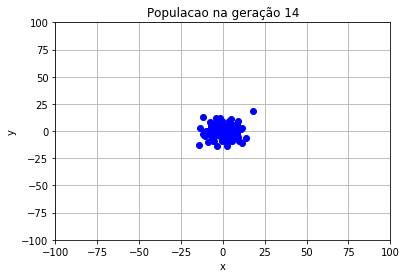

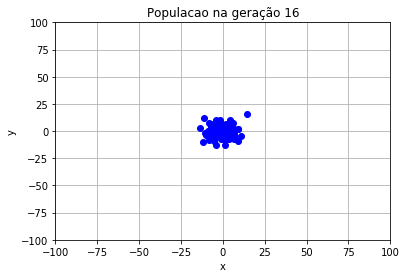

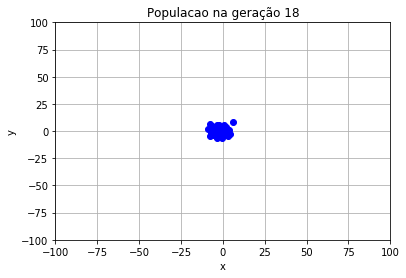

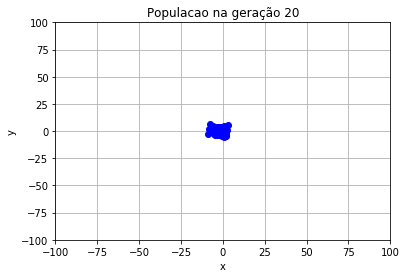

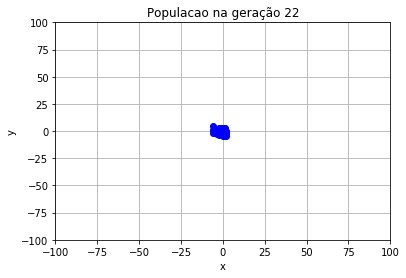

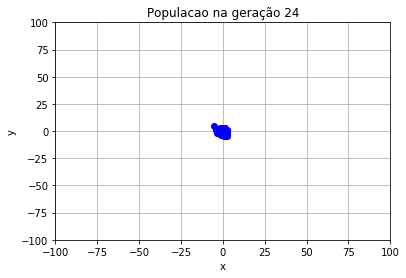

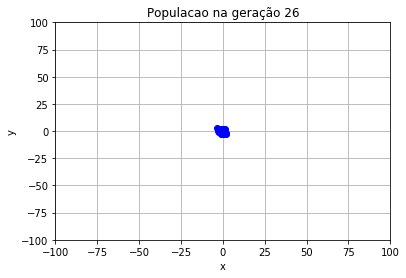

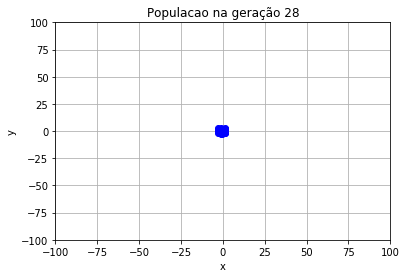

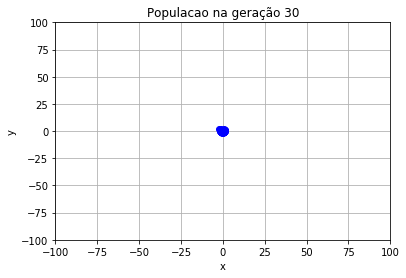

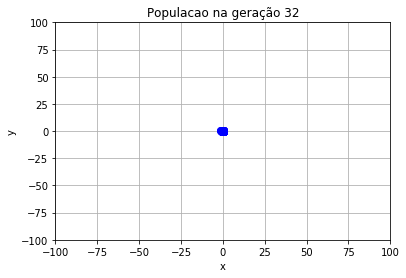

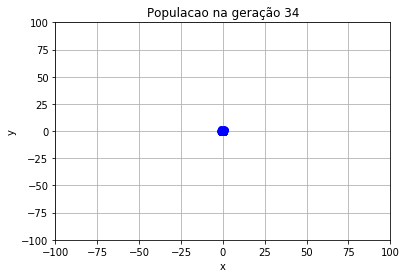

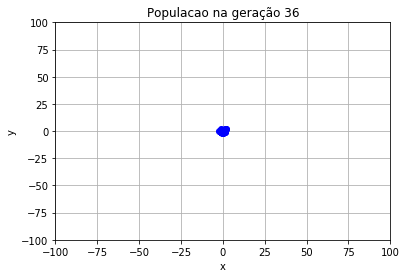

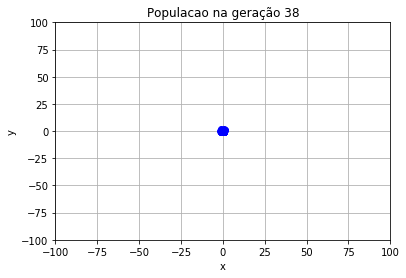

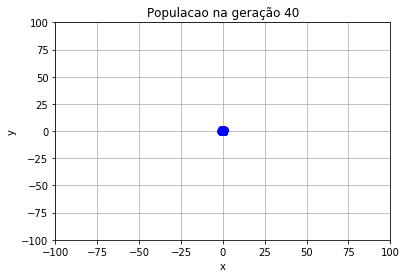

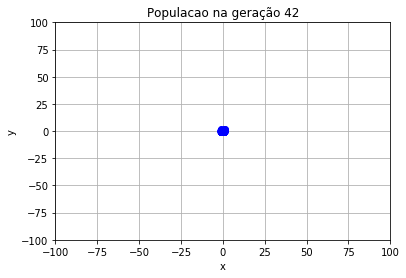

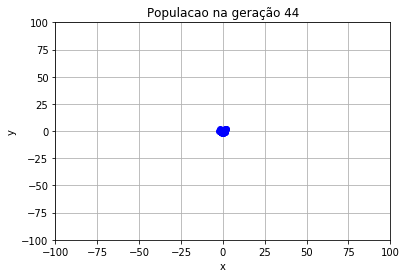

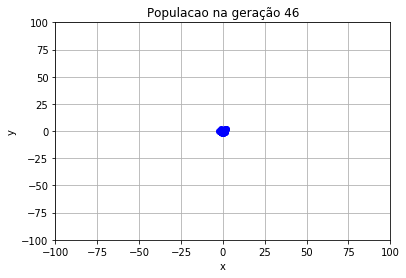

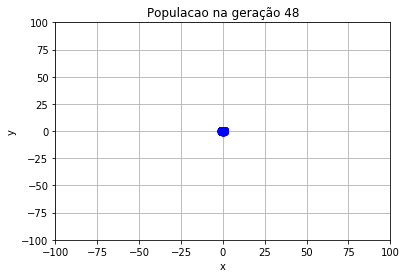

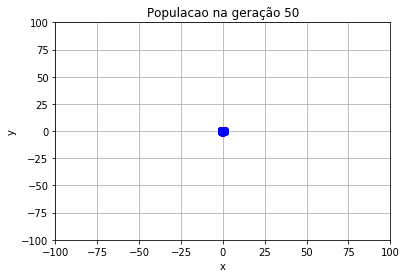

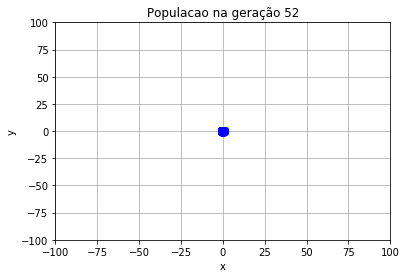

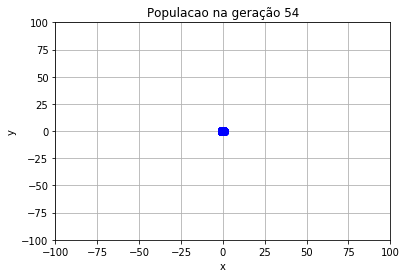

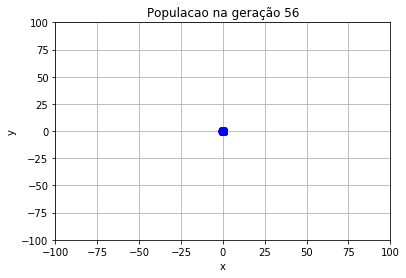

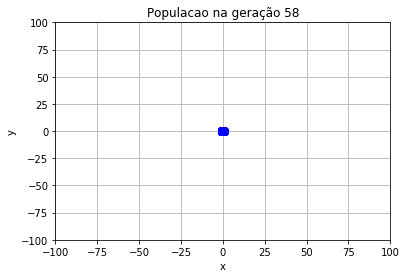

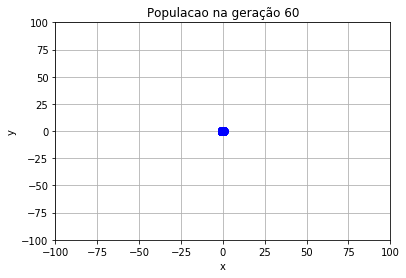

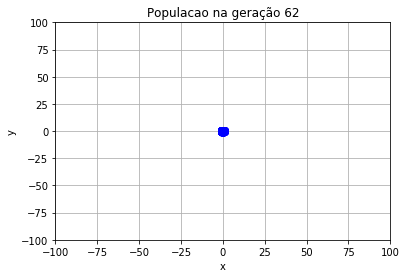

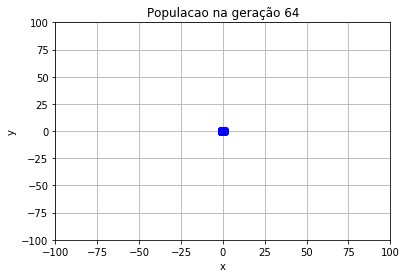

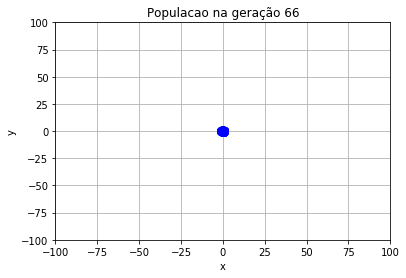

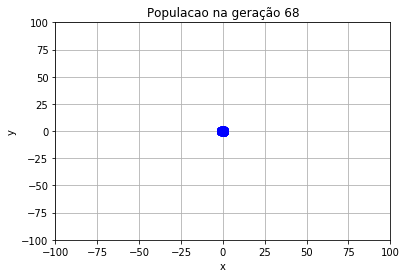

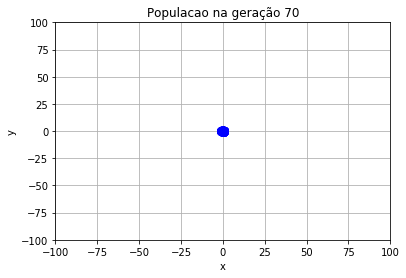

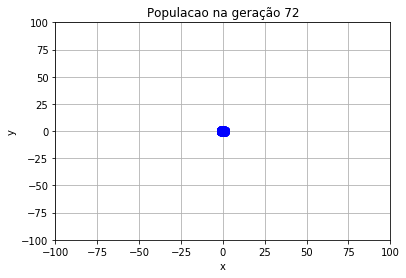

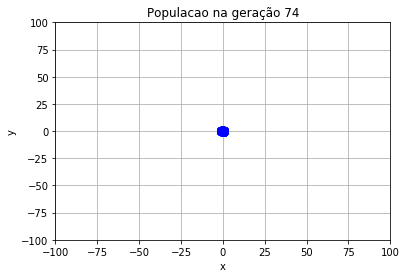

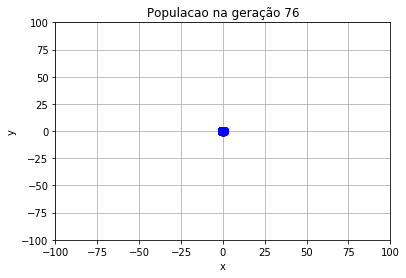

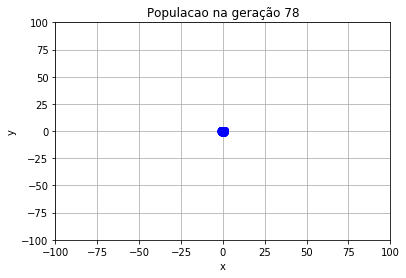

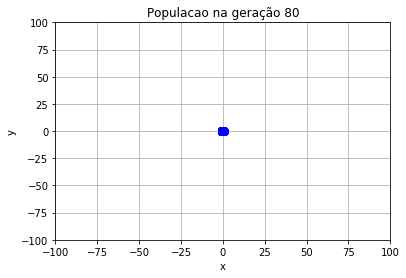

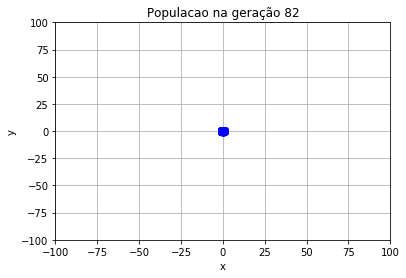

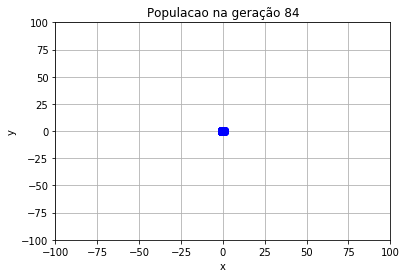

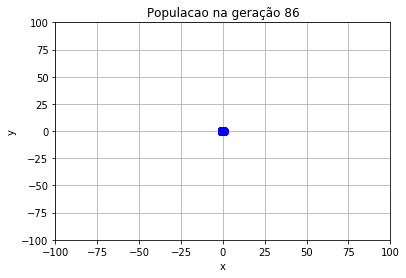

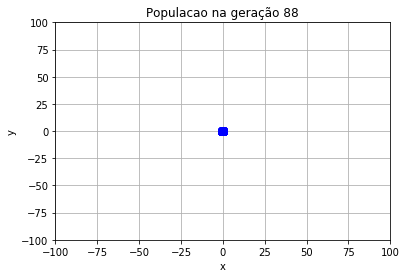

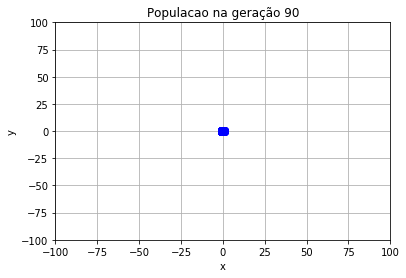

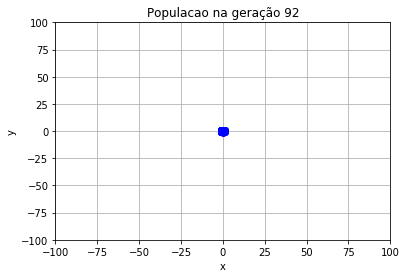

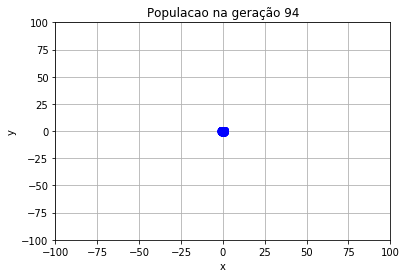

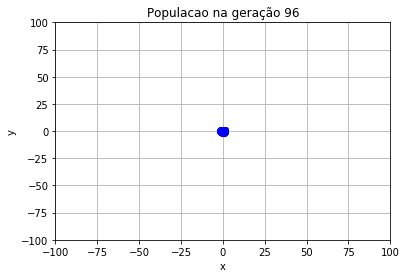

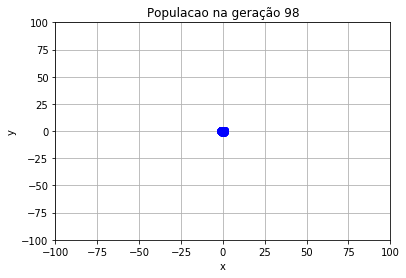

In [12]:
#CÉLULA PSO-MAIN-04
#Loop principal
generation_index = 0
for generation_index in range(0, max_generations) :
    
    #print(P)
    #print('================================')
    
    if(generation_index % 2 == 0) :
        plot_population(vParticles, generation_index)
        
    vParticles = runEpoch(vParticles)
        
    #stop = checkStopCondition(vParticles, stop_condition, 0.000001)
    #if(stop == True) :
    #    print('Convergencia atingida')
    #    break
        
#print(P)
#print(vParticles)
print(generation_index)

## Validação

### Execute o algoritmo e Observe se ocorre convergência. Utilize o código abaixo para determinar a solução.

A convergencia foi atingida na geração: 99
A particula vencedora foi: {'Fitness': 0.9986843305184279, 'X': -0.03005949417382743, 'Y': -0.020282038018048773}, com aptidão 0.9986843305184279
A solução do problema é x=-0.03005949417382743, y=-0.020282038018048773


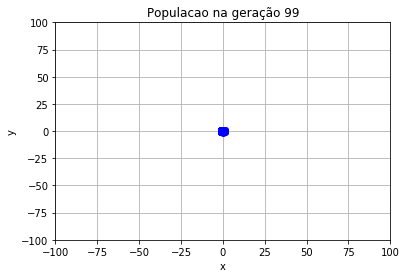

In [13]:
#CÉLULA PSO-MAIN-05
#Verificando os resultados
gBest = calcGBest(vParticles)

print('A convergencia foi atingida na geração: {}'.format(generation_index))
print('A particula vencedora foi: {}, com aptidão {}'.format(gBest, gBest['Fitness']))
print('A solução do problema é x={}, y={}'.format(gBest['X'], gBest['Y']))

plot_population(vParticles, generation_index)

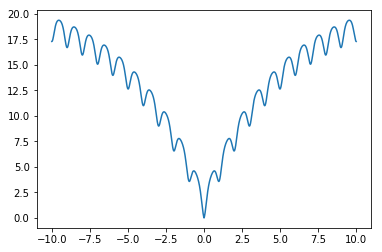

In [22]:
#Função custo interessante
x = np.arange(-10,10,0.01)
y = -20*np.exp(-0.2*np.sqrt(x**2)) - np.exp(np.cos(2*np.pi*x)) + 20 + np.exp(1)
plt.plot(x,y)

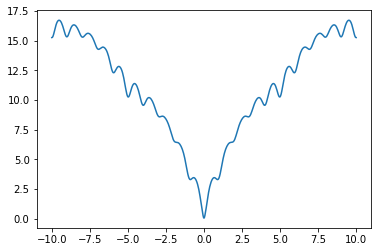

In [38]:
x1 = np.linspace(-10,10,500)
x2 = np.linspace(-2,2,500)

vVars = [x1, x2]
nVars = len(vVars)

y = -20*np.exp(-0.2*np.sqrt( 1/nVars * (x1**2 + x2**2) ) ) - np.exp(1/nVars * (np.cos(2*np.pi*x1) + np.cos(2*np.pi*x2)) ) + 20 + np.exp(1)
plt.plot(x1,y)

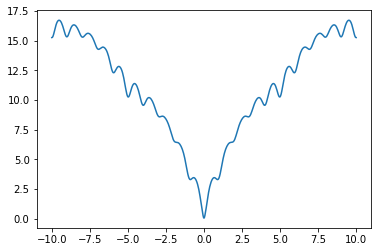

In [133]:
x1 = np.linspace(-10,10,500)
x2 = np.linspace(-2,2,500)
#x3 = np.linspace(-2,2,500)
nVars = 2 # é o numero de variaveis x1, x2, xn usados acima

vVars = zip(x1, x2)
#print(len(list(vVars)))

#Cada 'var' é uma tupla com n itens
avgSumSquaredX = []
avgSumCosX     = []
for var in vVars :
    squaredX = [item**2 for item in var]
    avgSumSquaredX.append(1/(nVars-1) * sum(squaredX))
    cosX = [np.cos(2*np.pi*item) for item in var]
    avgSumCosX.append(1/(nVars-1)*sum(cosX))

#print((sumCosX))
    
y = -20*np.exp(-0.2*np.sqrt( avgSumSquaredX ) ) - np.exp(avgSumCosX) + 20 + np.exp(1)
plt.plot(x1,y)